In [21]:
from qaoa import QAOA, problems, mixers, initialstates

import numpy as np
import networkx as nx

from plotroutines import *

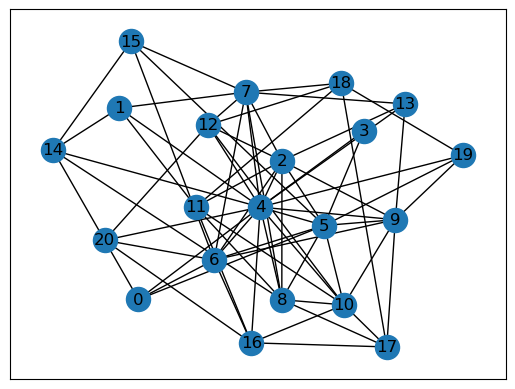

In [22]:
G=nx.read_gml("w_ba_n21_k4_0.gml") #retrieving the information about the graph (nodes, edges) from a file named w_ba_n21_k4_0.gml
nx.draw_networkx(G) #drawing the graph

In [23]:
mincost = -25.23404480588015  #precalculated minimum cost value. Will be used to compare for approximation ratio later.

In [24]:
#initializing vanilla QAOA with initial state, problem and mixer
#sampler, optimizer, reps are not defined as their default option is used. Sampler=
qaoa= QAOA(
    initialstate = initialstates.Plus(), #initial trial state= |+>
    problem = problems.MaxKCutBinaryFullH(G=G), #H_c
    mixer = mixers.X() #H_m=sum of X_i operators
)

#initializing QAOA using CVaR with initial state, problem and mixer and cvar
qaoa= QAOA(
    initialstate = initialstates.Plus(), #initial trial state= |+>
    problem = problems.MaxKCutBinaryFullH(G=G), #H_c
    mixer = mixers.X(), #H_m=sum of X_i operators
    cvar = 0.1 #
)

TypeError: MaxKCutBinaryFullH.__init__() missing 2 required positional arguments: 'k_cuts' and 'color_encoding'

In [ ]:
#Parametric sweep where no. of layers is varied from 0 to maxdepth (max no. of layers)

maxdepth = 10 
qaoa.optimize(depth=maxdepth)
qaoa_CVaR.optimize(depth=maxdepth)


In [ ]:
#Plotting the figure of energy landscapes wrt beta and gamma for p=1 
#Note: in the output above, energy landscape for p=1 is calculated by default, therefore defining p is not required.

plot_E(qaoa)
plot_E(qaoa_CVaR)

In [ ]:
#Plotting Approximation Ratio

#(function) def plot_ApproximationRatio(
#    qaoa_instance: Any,
#    maxdepth: Any,
#    mincost: Any,
#    maxcost: Any,
#    label: Any,
#    style: str = "",
#    fig: Any | None = None,
#    shots: Any | None = None
#) -> None

fig= pl.figure()

plot_ApproximationRatio(
    qaoa,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA vanilla",
    style="o--b",
    fig=fig
)

plot_ApproximationRatio(
    qaoa_CVaR,
    maxdepth,
    mincost=mincost,
    maxcost=0,
    label="QAOA CVaR",
    style="x--k",
    fig=fig
)